## U.S. GDP vs. Wage Income

### For every wage dollar paid, what is GDP output?

- Each worker on average currently contributes over 
  90,000 dollars annually of goods and services valued as GDP.
  
- Each worker on average currently earns about 
  43,300 dollars annually (steadily up from 35,000 since the 1990's).
  
- So one dollar in paid wages currently yields 
  2.23 dollars of products and services -- 
  but that multiplier is not a constant historically.

### What can we say about GDP growth by observing wage growth?

We find the assumption of time-invariant multiplier 
gives poor results, whereas we obtain a reasonable 
regression fit (Appendix 3) by treating the multiplier as 
time-variant (workers are increasingly more productive):

$\%(G) \approx 1.3 * \%(m w)$

In contrast, our *local numerical approximation* 
derived in the conclusion suggests using the most 
recent estimated parameters: 

$\%(G) \approx 1.9 * \%(w)$

So roughly speaking, 1.0% wage growth equates to 1.9% GDP growth 
(yet data shows real wages can decline substantially due to the economy).

The abuse of notation is due to the fact that 
our observations are not in continuous-time, 
but rather in interpolated discrete-time 
and in (non-logarithmic) percentage terms.


Short URL: https://git.io/gdpwage

*Dependencies:*

- Repository: https://github.com/rsvp/fecon235
- Python: matplotlib, pandas
     
*CHANGE LOG*

    2016-11-10  Revisit after two years. Use PREAMBLE-p6.16.0428.
                   Update results with newly estimated parameters.
                   This notebook should run under Python 2.7 or 3.
                   Appendix 3 modified to reflect trend fit of multiplier.
    2014-12-07  Update code and commentary.
    2014-08-15  First version.

In [1]:
from fecon235.fecon235 import *

In [2]:
#  PREAMBLE-p6.16.0428 :: Settings and system details
from __future__ import absolute_import, print_function
system.specs()
pwd = system.getpwd()   # present working directory as variable.
print(" ::  $pwd:", pwd)
#  If a module is modified, automatically reload it:
%load_ext autoreload
%autoreload 2
#       Use 0 to disable this feature.

#  Notebook DISPLAY options:
#      Represent pandas DataFrames as text; not HTML representation:
import pandas as pd
pd.set_option( 'display.notebook_repr_html', False )
from IPython.display import HTML # useful for snippets
#  e.g. HTML('<iframe src=http://en.mobile.wikipedia.org/?useformat=mobile width=700 height=350></iframe>')
from IPython.display import Image 
#  e.g. Image(filename='holt-winters-equations.png', embed=True) # url= also works
from IPython.display import YouTubeVideo
#  e.g. YouTubeVideo('1j_HxD4iLn8', start='43', width=600, height=400)
from IPython.core import page
get_ipython().set_hook('show_in_pager', page.as_hook(page.display_page), 0)
#  Or equivalently in config file: "InteractiveShell.display_page = True", 
#  which will display results in secondary notebook pager frame in a cell.

#  Generate PLOTS inside notebook, "inline" generates static png:
%matplotlib inline   
#          "notebook" argument allows interactive zoom and resize.

 ::  Python 2.7.11
 ::  IPython 4.2.0
 ::  jupyter_core 4.1.0
 ::  notebook 4.1.0
 ::  matplotlib 1.5.1
 ::  numpy 1.10.4
 ::  pandas 0.18.0
 ::  pandas_datareader 0.2.1
 ::  Repository: fecon235 v5.16.1107 develop
 ::  Timestamp: 2016-11-11, 02:48:07 UTC
 ::  $pwd: /media/yaya/virt15h/virt/dbx/Dropbox/ipy/fecon235/nb


## Examine U.S. population statistics

In [3]:
#  Total US population in millions, released monthly:
pop = get( m4pop ) / 1000.0

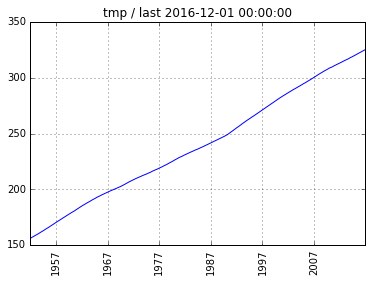

In [4]:
plot( pop )

In [5]:
georet( pop, 12 )

[1.13, 1.13, 0.09, 12, 780, '1952-01-01', '2016-12-01']

This gives the annualized geometric growth rate of about 1.13%, 
but one might also look at fertility rates which supports the population, 
e.g. 2.1 children per female will ensure growth 
(cf. fertility rates in Japan which has been declining over the decades).

In [6]:
#  Fraction of population which works:
emppop = get( m4emppop ) / 100.0

Workers would be employed adults, which presumably exclude children 
(20% of pop) and most elderly persons (14% of pop). 
There is a dramatic drop in working% from about 64% in 2001 
to about 59% recently.

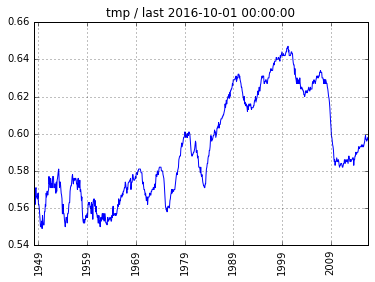

In [7]:
plot( emppop )

In [8]:
#  Total US workers in millions:
workers = todf( pop * emppop )

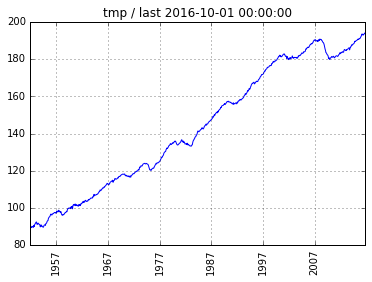

In [9]:
plot( workers )

In [10]:
georet( workers, 12 )

[1.18, 1.19, 1.16, 12, 778, '1952-01-01', '2016-10-01']

In [11]:
tail( workers )

                     Y
T                     
2016-04-01  193.131888
2016-05-01  193.247109
2016-06-01  193.050956
2016-07-01  193.502625
2016-08-01  193.645905
2016-09-01  194.116182
2016-10-01  193.931271

**Total population and the number of workers grow annually around 1.15% -- 
but the annualized volatility for workers is much larger than the 
total population (1.16% vs 0.09%). The decrease in workers due to the
Great Recession is remarkably, and since that period there has 
been a steady increase north of 190 million workers.**

## Examine U.S. Gross Domestic Product

In [12]:
#  Deflator, scaled to 1 current dollar:
defl = get( m4defl )

In [13]:
#  Nominal GDP in billions:
gdp = get( m4gdpus )
#  The release cycle is quarterly, but we resample to monthly,
#  in order to sync with the deflator.
#  We do NOT use m4gdpusr directly because that is in 2009 dollars.

#  Real GDP in current billions:
gdpr = todf( defl * gdp )

In [14]:
tail( gdpr )

                       Y
T                       
2016-01-01  18500.467764
2016-02-01  18546.746023
2016-03-01  18589.942684
2016-04-01  18594.323425
2016-05-01  18626.808527
2016-06-01  18667.648188
2016-07-01  18723.722889

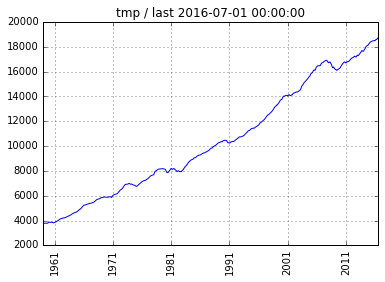

In [15]:
#  Real GDP: showing rise from $4 trillion economy
#  in the 1960's to nearly $19 trillion dollars.
plot( gdpr )

In [16]:
georet( gdpr, 12 )

[2.82, 2.83, 1.07, 12, 691, '1959-01-01', '2016-07-01']

Real GDP geometric rate of growth is 2.8% per annum 
(presumably due to the working population). 
We could say that is the *natural growth rate* 
of the US economy.

### Real GDP per worker (NOT per capita)

In [17]:
#  Real GDP per worker -- NOT per capita:
gdprworker = todf( gdpr / workers )

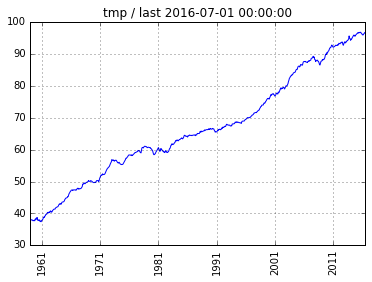

In [18]:
plot( gdprworker )
#  plotted in thousands of dollars

**Chart shows each worker on average currently contributes 
over *90,000 dollars annually* 
of goods and services valued as GDP.**

In [19]:
georet( gdprworker, 12 )

[1.64, 1.65, 1.36, 12, 691, '1959-01-01', '2016-07-01']

Workers have generally been more *productive* since WW2, 
increasingly contributing to GDP at an annual pace of 1.6%.

## Examine wage income

In [20]:
#  Nominal annual INCOME, assuming 40 working hours per week, 50 weeks per year:
inc = get( m4wage ) * 2000

In [21]:
#  REAL income in thousands per worker:
rinc = todf((defl * inc) / 1000.0)

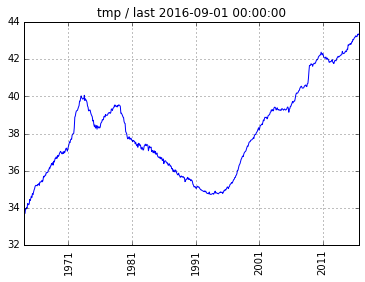

In [22]:
#  Income in thousands, current dollars per worker:
plot( rinc )

**INCOME chart shows each worker on average currently earns 
about *43,300 dollars annually* 
(steadily up from 35,000 since the 1990's).**

In [23]:
tail( rinc )

                    Y
T                    
2016-03-01  43.256085
2016-04-01  43.255503
2016-05-01  43.214448
2016-06-01  43.233339
2016-07-01  43.347900
2016-08-01  43.318762
2016-09-01  43.360000

In [24]:
georet( rinc, 12 )

[0.48, 0.48, 0.82, 12, 633, '1964-01-01', '2016-09-01']

In general, real income does not always steadily go up, 
as the chart demonstrates. A stagnating economy with high inflation 
will wear away real wages.

Since 1964, the geometric rate of real wage growth has been 
approximately 0.5% -- far less in comparison to the 
natural growth rate of the economy.

## How do wages multiply out to GDP?

In [25]:
#  Ratio of real GDP to real income per worker:
gdpinc = todf( gdprworker / rinc )

Implicitly our assumption is that workers earn wages at the 
nonfarm non-supervisory private-sector rate. 
This is not a bad assumption for our purposes, 
provided changes in labor rates are uniformly applied 
across other various categories since we are 
focusing on the multiplier effect.

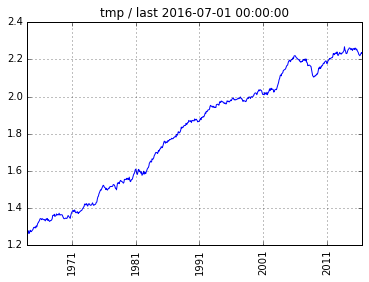

In [26]:
plot( gdpinc )

In [27]:
tail( gdpinc )

                   Y
T                   
2016-01-01  2.226120
2016-02-01  2.222326
2016-03-01  2.219059
2016-04-01  2.225794
2016-05-01  2.230470
2016-06-01  2.236654
2016-07-01  2.232221

*The ratio of real GDP to real income per worker has increased 
from 1.4 in the 1970's to 2.2 recently.* 
(There is a noticeable temporary dip after the 2007 crisis.) 

**One dollar in paid wages currently 
yields 2.23 dollars of products and services.**  

The time-series shows workers have become 
more productive in producing national wealth.

Hypothesis: over the years, *technology* has exerted 
upward pressure on productivity, and downward pressure on wages. 
In other words, the slope of gdpinc is a function of 
technological advances. 
(Look for counterexamples in other countries.)

 ::  regresstime slope = 0.00171483954109


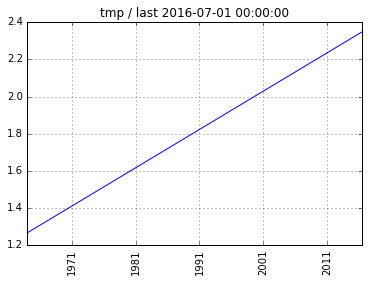

In [28]:
#  Let's fit and plot the simplified time trend:
gdpinc_trend = trend( gdpinc )
#  The computed slope will be relative to one month.

plot( gdpinc_trend )

The estimated slope implies that each year adds 0.02 to gdpinc multiplier.

Clearly, we can rule out a *constant* gdpinc multiplier effect.

Rather than a straight line estimator, we can forecast 
the gdpinc multiplier using the Holt-Winters method, 
one year ahead, month-by-month...

In [29]:
#  Holt-Winters monthly forecasts:
holtfred( gdpinc, 12 )

    Forecast
0   2.232221
1   2.222580
2   2.220730
3   2.218881
4   2.217031
5   2.215182
6   2.213332
7   2.211483
8   2.209633
9   2.207784
10  2.205934
11  2.204085
12  2.202235

Interestingly, forecasting the local terrain is more complex 
than a global linear regression. 
The Holt-Winters forecast for mid-2017 shows a 
0.03 *decrease* in the gdpinc multiplier.

If gdpinc multiplier is constant, then mathematically a 
x% change in wages would translate to a straightforward x% change in GDP. 
This is why the Fed Reserve, especially Janet Yellen, 
pays so much attention to wage growth. 
But our analysis clearly shows the multiplier is not stable.

Linear regression between real GDP growth and real wage growth 
performs poorly when the multiplier is treated 
as if it is time-invariant (see Appendix 1).

## CONCLUSION: Numerical approximation for GDP growth based on observations from wage growth

We found evidence of a **time-variant multiplier** 
$m_t$ such that $G_t = m_t w_t$. 
Let us express GDP growth as the percentage change:

$\begin{aligned}
\frac{G_{t+1} - G_t}{G_t} = \frac{m_{t+1} w_{t+1}}{m_t w_t} - 1
\end{aligned}$

Notice that LHS is just the growth rate of $m_t w_t$. 
Abusing notation, we could write $\%(G) = \%(m w)$

Empirically the multiplier varies linearly as a function of time. 

Let us evaluate the GDP growth numerically on the LHS, 
using the most recent multiplier and its expected linear incrementation, 
assuming wage increase of 1% *year-over-year*:

$\begin{aligned}
(\frac{2.23 + 0.02}{2.23}) {1.01} - 1 = 0.0191
\end{aligned}$

Under such assumptions, GDP increases 1.91% over one year.

In other words, **as a rough current approximation: 
GDP_growth = 1.9 \* wage_growth,** i.e.

$\%(G) \approx 1.9 * \%(w)$ at current estimated parameters.

This is an useful approximation since GDP is only released quarterly, 
whereas wage data is released monthly. 
(The result also depends on the interpolation
method used in our *resample_main()*.)

Appendix 3 arrives at the following linear regression result:

$\%(G) \approx 1.3 * \%(m w)$

which takes the entire dataset since 1964 into account, 
using gdpinc_trend as time-varying multipler.

- - - -

### APPENDIX 1: Linear regression of 0.49 R-squared if gdpinc multiplier is mistakenly treated as a constant

In [30]:
stat2( gdprworker[Y], rinc[Y] )

 ::  FIRST variable:
count    691.000000
mean      66.485116
std       16.522582
min       37.386155
25%       55.670744
50%       65.051719
75%       79.089637
max       96.832448
Name: Y, dtype: float64

 ::  SECOND variable:
count    633.000000
mean      38.031736
std        2.434287
min       33.713467
25%       35.911289
50%       37.667098
75%       39.439192
max       43.360000
Name: Y, dtype: float64

 ::  CORRELATION
0.70095718007
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     607.6
Date:                Thu, 10 Nov 2016   Prob (F-statistic):           2.12e-94
Time:                        18:48:39   Log-Likelihood:                -2386.8
No. Observations:                 631   AIC:                             4778.
Df 

- - - -

### APPENDIX 2: Linear regression between real GDP growth and real wage growth: 0.19 R-squared when multiplier is treated as time-invariant

Note: an alternative is to use the difference betweeen 
logarithmic values, but we intentionally use the pcent() function YoY 
since our data frequency is not even remotely continuous-time.

In [31]:
#  Examine year-over-year percentage growth:
stat2( pcent(gdpr, 12)[Y], pcent(rinc, 12)[Y] ) 

 ::  FIRST variable:
count    679.000000
mean       2.884252
std        2.437540
min       -3.832416
25%        1.656733
50%        3.006804
75%        4.260688
max        9.206530
Name: Y, dtype: float64

 ::  SECOND variable:
count    621.000000
mean       0.471273
std        1.359933
min       -3.716831
25%       -0.508176
50%        0.580607
75%        1.355072
max        4.590047
Name: Y, dtype: float64

 ::  CORRELATION
0.43615914959
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     144.9
Date:                Thu, 10 Nov 2016   Prob (F-statistic):           3.92e-30
Time:                        18:48:39   Log-Likelihood:                -1361.0
No. Observations:                 619   AIC:                             2726.
Df 

- - - -

### Appendix 3: Improved linear regression of growth model: 0.60 R-squared with time-variant multiplier (trend based)

Let the Python variable mw represents the series $m_t w_t$ 
in our analytical model described in the conclusion:

In [32]:
#  The string argument allows us to label a DataFrame column:
mw     = todf( gdpinc_trend * rinc, 'mw' )
mwpc   = todf( pcent( mw, 12), 'mwpc' )
gdprpc = todf( pcent( gdpr, 12), 'Gpc' )
dataf = paste( [gdprpc, mwpc] )

In [33]:
#  The 0 in the formula means no intercept:
result = regressformula( dataf['1964':], 'Gpc ~ 0 + mwpc' )
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    Gpc   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     933.7
Date:                Thu, 10 Nov 2016   Prob (F-statistic):          1.17e-125
Time:                        18:48:40   Log-Likelihood:                -1398.1
No. Observations:                 619   AIC:                             2798.
Df Residuals:                     618   BIC:                             2803.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
mwpc           1.3131      0.043     30.557      0.0

R-squared after 1964 looks respectable at around 0.60, however, 
the fit is terrible after the Great Recession. 

The estimated coefficent implies this fitted equation: 

$\%(G) \approx 1.3 * \%(m w)$

In contrast, our *local numerical approximation* derived in the conclusion 
suggests for the most recent estimated parameters: 

$\%(G) \approx 1.9 * \%(w)$